<a href="https://colab.research.google.com/github/isabellasims/Google-colabs/blob/master/Copy_of_Programming_Languages_Julia_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.4.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools PyCall PyPlot"
JULIA_PACKAGES_IF_GPU="CUDA"
JULIA_NUM_THREADS=4
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"'
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Unrecognized magic `%%shell`.

Julia does not use the IPython `%magic` syntax.   To interact with the IJulia kernel, use `IJulia.somefunction(...)`, for example.  Julia macros, string macros, and functions can be used to accomplish most of the other functionalities of IPython magics.


In [3]:
println("Hello")
println("HI");

Hello
HI


In [4]:
import Pkg
Pkg.add("Plots")


   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


import Pkg # allow package imports




Pkg.add("your specific package name here" #import package

In [5]:
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("HTTP")

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


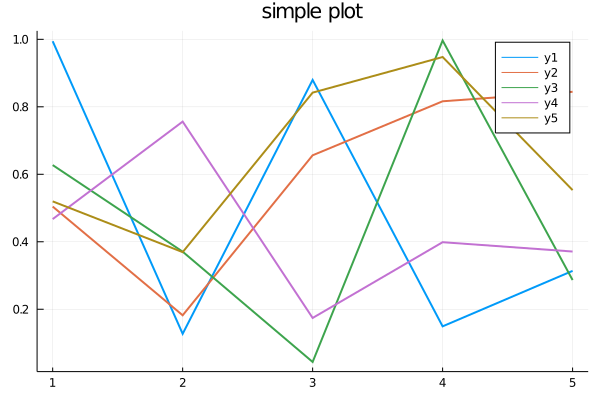

In [23]:
using Plots
plot(rand(5,5),linewidth = 2,title="simple plot")

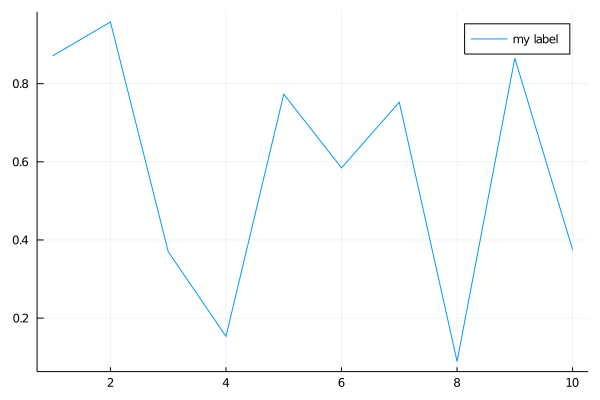

In [24]:
x = 1:10
y = rand(10) # These are the plotting data 
plot(x,y, label="my label")


In [45]:
# using HTTP, DataFrames, CSV # load packages
#r = HTTP.get("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
#d = HTTP.get("https://github.com/nytimes/covid-19-data/blob/master/us-states.csv")
#url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"

In [47]:
using CSV
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
CSV.File(download(url))
d = download("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv","us-states.csv" )
f = CSV.File(d)

14534-element CSV.File{true}:
 CSV.Row: (date = 2020-01-21, state = "Washington", fips = 53, cases = 1, deaths = 0)
 CSV.Row: (date = 2020-01-22, state = "Washington", fips = 53, cases = 1, deaths = 0)
 CSV.Row: (date = 2020-01-23, state = "Washington", fips = 53, cases = 1, deaths = 0)
 CSV.Row: (date = 2020-01-24, state = "Illinois", fips = 17, cases = 1, deaths = 0)
 CSV.Row: (date = 2020-01-24, state = "Washington", fips = 53, cases = 1, deaths = 0)
 CSV.Row: (date = 2020-01-25, state = "California", fips = 6, cases = 1, deaths = 0)
 CSV.Row: (date = 2020-01-25, state = "Illinois", fips = 17, cases = 1, deaths = 0)
 CSV.Row: (date = 2020-01-25, state = "Washington", fips = 53, cases = 1, deaths = 0)
 CSV.Row: (date = 2020-01-26, state = "Arizona", fips = 4, cases = 1, deaths = 0)
 CSV.Row: (date = 2020-01-26, state = "California", fips = 6, cases = 2, deaths = 0)
 CSV.Row: (date = 2020-01-26, state = "Illinois", fips = 17, cases = 1, deaths = 0)
 CSV.Row: (date = 2020-01-26, state 

In [91]:
# can't access first index (0), will throw eroor
f.date[1]


2020-01-21

In [92]:
f.date[9000]

2020-08-13

In [66]:
;ls

sample_data
us-states.csv


Streaming output truncated to the last 5000 lines.
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-23
2020-08-24
2020-08-24
2020-08-24
2020-08-24
2020-08-24
2020-08-24
2020-08-24
2020-08-24
2020-08-24
2020-08-24
2020-08-24
2020-08-24
2020-08-24
2020-08-24
2020-08-24
2020-08-24
2020-08-24
2020-08-24
2020-08-24
2020-08-24
2020-08-24
2020-08-24
2020-08-24
2020-08-24
2020-08-24
2020-08-24
2020-08-24
2020-08-24
2020-08-24
2020-08-24
2020-08-24
2020-08-24
2020-08-24
2020-08-24
2020-08-24
2020-08-24
202

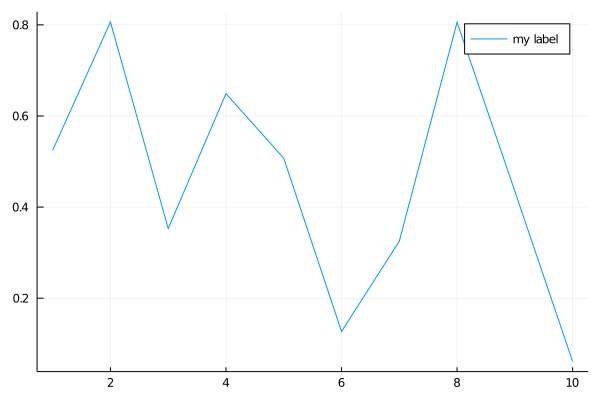

In [111]:
x = 1:10
y = rand(10) # These are the plotting data 

count_d = 0
count_x = 0
println(f.date[10])

tup = size(f.date)
num_rows = tup[1]

for i = 1:num_rows
           println(f.date[i])
       end
plot(x,y, label="my label")
